Processing 70M model data:
Found 154 files in ../eval_70/
Successfully processed 154 files from ../eval_70/
Filtered out 0 files with step < 0

Processing 410M model data:
Found 154 files in ../eval_410/
Successfully processed 154 files from ../eval_410/
Filtered out 0 files with step < 0


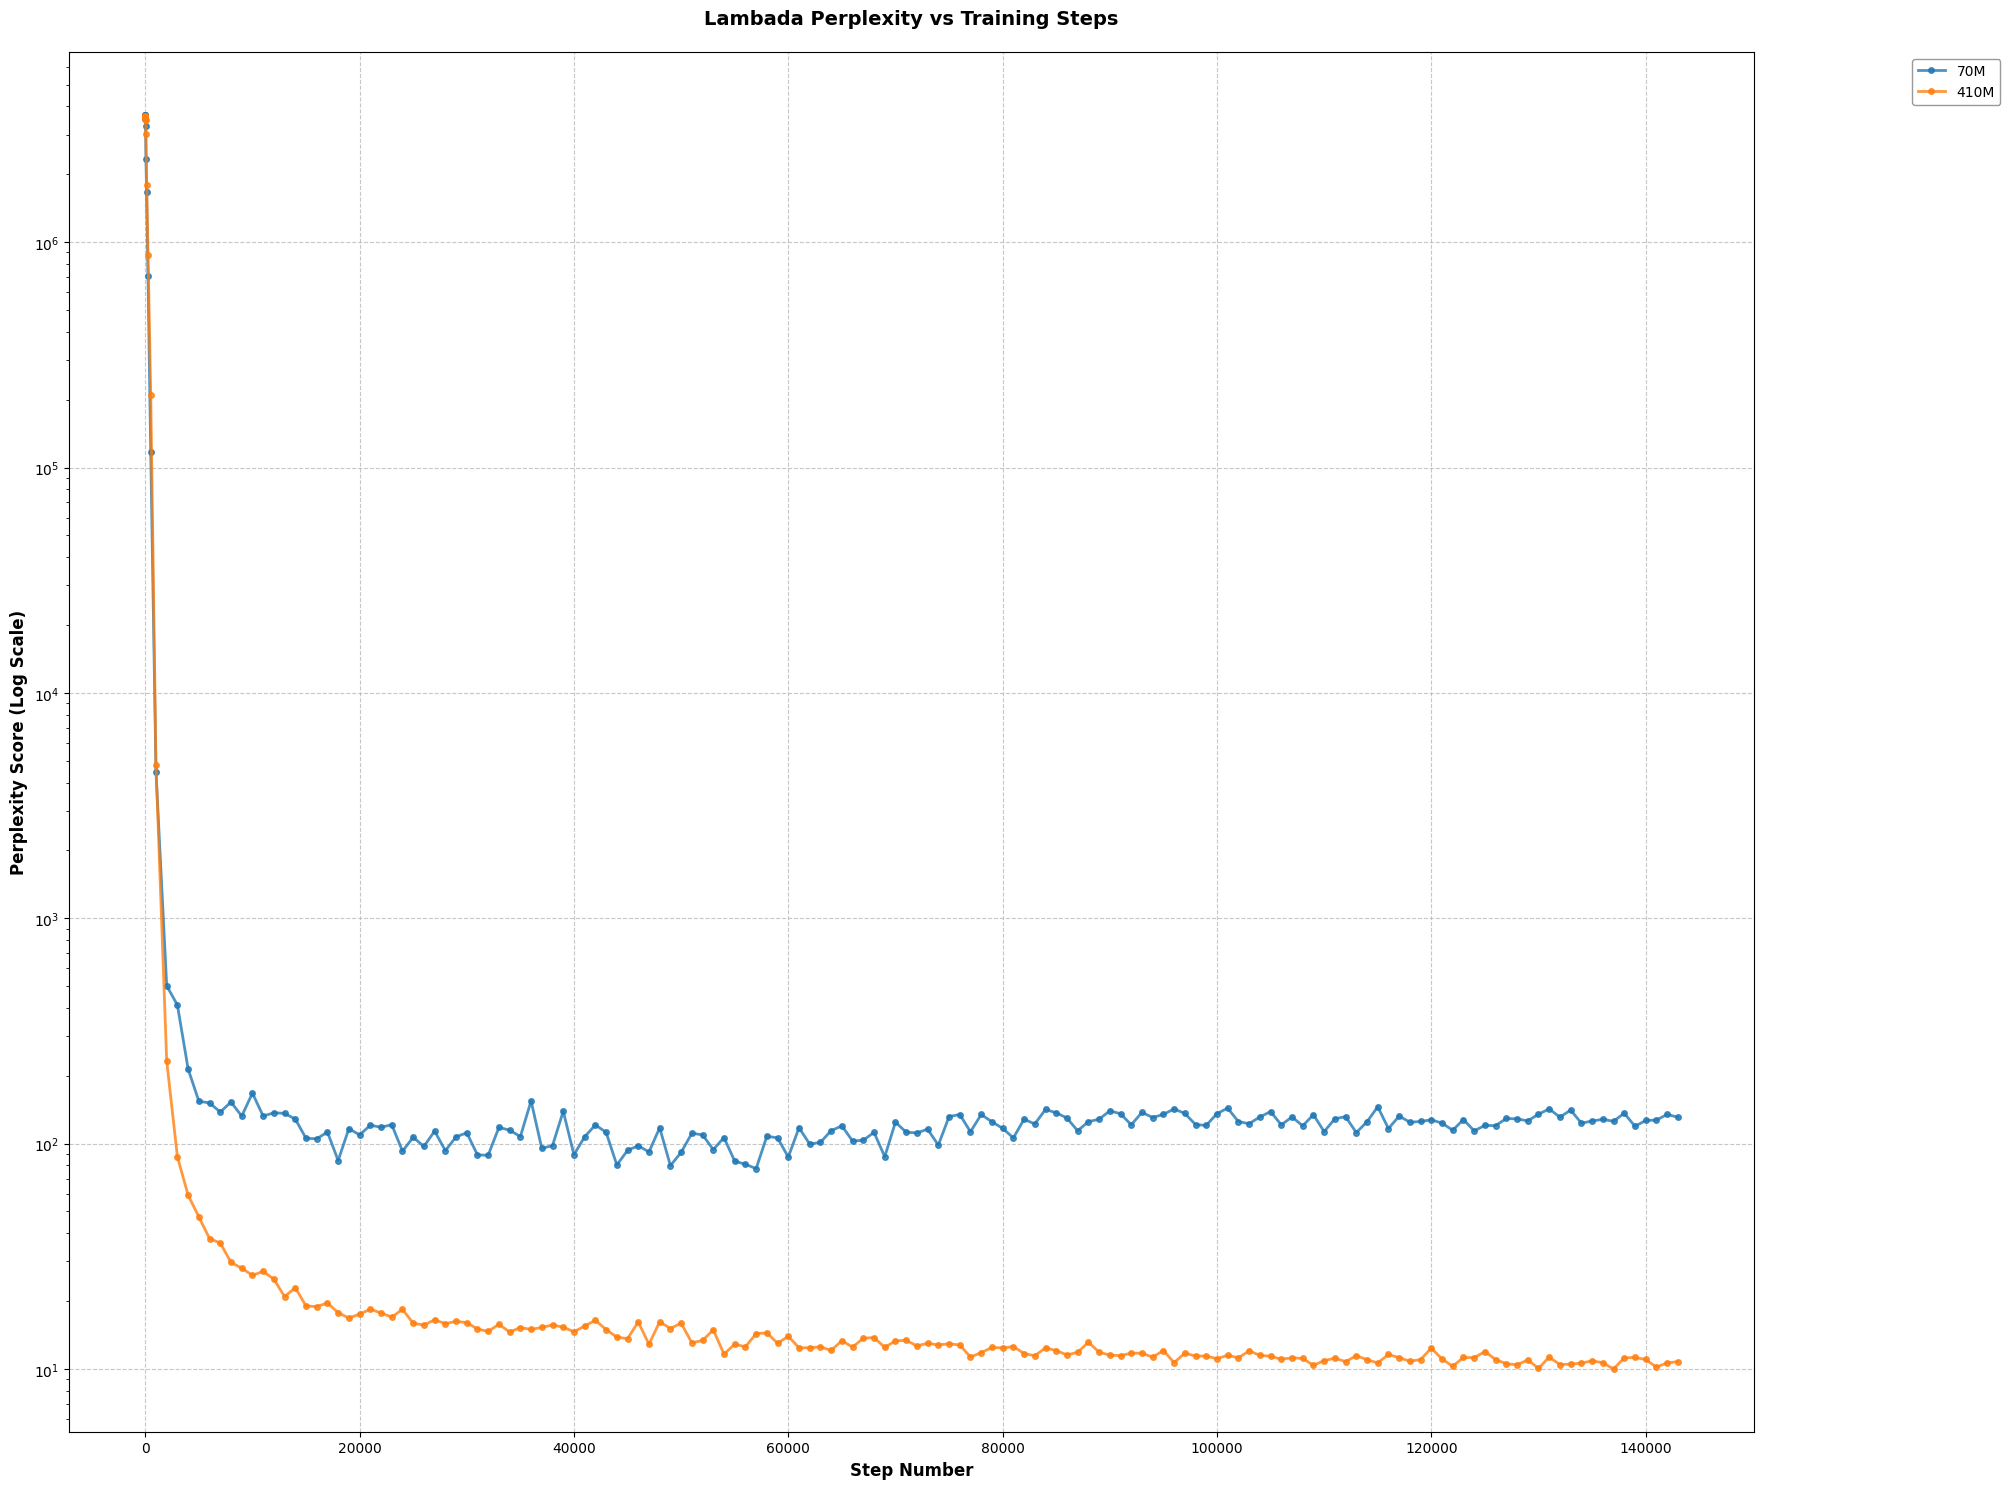

In [14]:
import json
import glob
import matplotlib.pyplot as plt
import re

def extract_step_number(filename):
    match = re.search(r'step(\d+)_eval_results\.json', filename)
    if match:
        return int(match.group(1))
    return None

def load_and_process_data(folder_path, min_step=0):
    files = glob.glob(f"{folder_path}/*.json")
    print(f"Found {len(files)} files in {folder_path}/")
    
    data_points = []
    processed_files = 0
    filtered_points = 0
    
    for file in files:
        step = extract_step_number(file)
        if step is not None:
            try:
                if step >= min_step:
                    with open(file, 'r') as f:
                        data = json.load(f)
                        perplexity = round(data['lambada_openai']['perplexity,none'], 2)
                        data_points.append((step, perplexity))
                        processed_files += 1
                else:
                    filtered_points += 1
            except Exception as e:
                print(f"Error processing {file}: {str(e)}")
    
    print(f"Successfully processed {processed_files} files from {folder_path}/")
    print(f"Filtered out {filtered_points} files with step < {min_step}")
    
    return sorted(data_points)

# Load data from both folders
print("Processing 70M model data:")
data_70m = load_and_process_data('../eval_70')
print("\nProcessing 410M model data:")
data_410m = load_and_process_data('../eval_410')

# Separate steps and perplexity scores for plotting
steps_70m, perplexity_70m = zip(*data_70m)
steps_410m, perplexity_410m = zip(*data_410m)

# Create the plot with improved styling
plt.figure(figsize=(20, 15))  # Increased figure size

# Plot with improved styling
plt.plot(steps_70m, perplexity_70m, label='70M', marker='o', markersize=4, 
         linewidth=2, color='#1f77b4', alpha=0.8)
plt.plot(steps_410m, perplexity_410m, label='410M', marker='o', markersize=4, 
         linewidth=2, color='#ff7f0e', alpha=0.8)

# Customize the plot
plt.xlabel('Step Number', fontsize=12, fontweight='bold')
plt.ylabel('Perplexity Score (Log Scale)', fontsize=12, fontweight='bold')
plt.title('Lambada Perplexity vs Training Steps', fontsize=14, fontweight='bold', pad=20)

# Improve legend
plt.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='gray', 
          loc='upper right', bbox_to_anchor=(1.15, 1))

# Improve grid
plt.grid(True, linestyle='--', alpha=0.7)

# Use log scale for y-axis since values vary greatly
plt.yscale('log')

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add tight layout to prevent text cutoff
plt.tight_layout()

# Save the plot with higher DPI
plt.savefig('../plots/lambada_comparison.png', dpi=300, bbox_inches='tight')